In [2]:
import numpy as np
import pathpy as pp
import math
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import tqdm

## Friendship Paradox and Generating Functions

### a)

 The following function generates a graphic degree sequence of length $n$ distrubuted accourding to a log-normal distribution with parameters $\sigma$ and $\mu$.

In [48]:
def generate_microstate_with_log_normal_degree_dist(n: int, mu: float, sigma: float) -> pp.Network:
    degrees = [1]
    while not pp.generators.is_graphic_Erdos_Gallai(degrees):
        degrees = np.random.default_rng().lognormal(mean=mu, sigma=sigma, size=n).round().astype(int)
    return pp.generators.Molloy_Reed(degrees)


In [58]:
# We generate a number of microstates for different mu and sigma and compute the difference between their mean neighbor degree and mean degree
# This may take a while/need serveral restarts since we may draw weird sequences from the distribution
mus = np.linspace(1, 2, num=15)
sigmas = np.linspace(0, 0.8, num=15)
n = 110

diff = np.zeros((len(mus), len(sigmas)))

with tqdm.tqdm(total=len(mus)*len(sigmas)) as pbar:
    for i, mu in enumerate(mus):
        for j, sigma in enumerate(sigmas):
            net = generate_microstate_with_log_normal_degree_dist(n, mu, sigma) 
            diff[i,j] = net.mean_neighbor_degree() - net.mean_degree()
            pbar.update(1)

100%|██████████| 225/225 [00:56<00:00,  3.98it/s]


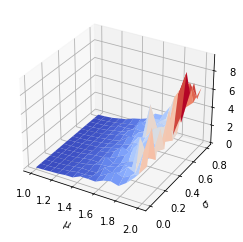

In [60]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
m,s = np.meshgrid(mus, sigmas)
ax.set_xlabel("$\mu$")
ax.set_ylabel("$\sigma$")


ax.plot_surface(m,s,diff,cmap=cm.coolwarm)

We note that the mean neighbor degree is always equal to or larger than the mean degree. The difference between both becomes larger with increasing $\mu$ and $\sigma$.